In [1]:

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 로지스틱 회귀
from statsmodels.api import Logit
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

from scipy.stats import f_oneway

from sklearn.metrics import r2_score
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline
matplotlib.rc('font',family = 'Noto Sans CJK JP')
matplotlib.rc('axes',unicode_minus = False)

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

# matplotlib.rc('font',family='Malgun Gothic')
matplotlib.rc('font',family='Noto Sans CJK JP')
matplotlib.rc('axes',unicode_minus=False)

In [2]:
df  = pd.read_csv("/home/piai/다운로드/control_para.csv", encoding='euc-kr')
df.head()

,Unnamed: 0,No_Die,process,type,Temp_OXid,ppm,Pressure,Oxid_time,process 2,N2_HMDS,...,Temp_implantation,Furance_Temp,RTA_Temp,process4.1,Target,Lot_Num,Wafer_Num,Datetime,path,short_path
0,0,NOLSM325131325,Oxidation,dry,1214.307948,26.69,0.203,120,Photo,17.367,...,103.433,854,154,Inspect,141,13,28,01-03-2022,21111,2111
1,1,NOLSM326132326,Oxidation,dry,978.110792,30.86,0.217,137,Photo,16.090,...,105.552,895,156,Inspect,55,13,29,01-03-2022,21122,2112
2,2,NOLSM327133327,Oxidation,dry,1176.019149,31.07,0.218,116,Photo,19.026,...,102.598,898,152,Inspect,96,13,30,01-03-2022,21133,2113
3,3,NOLSM328134328,Oxidation,dry,933.442733,31.04,0.196,143,Photo,18.891,...,102.963,879,155,Inspect,105,13,31,01-03-2022,21111,2111
4,4,NOLSM329135329,Oxidation,wet,1140.598752,31.37,0.215,76,Photo,13.788,...,101.419,882,155,Inspect,79,13,32,01-03-2022,21122,2112


In [3]:
df = df.drop(columns=['Unnamed: 0'])

In [4]:
df.isnull().sum()

No_Die               0
process              0
type                 0
Temp_OXid            0
ppm                  0
Pressure             0
Oxid_time            0
process 2            0
N2_HMDS              0
pressure_HMDS        0
temp_HMDS            0
temp_HMDS_bake       0
time_HMDS_bake       0
spin1                0
spin2                0
spin3                0
photoresist_bake     0
temp_softbake        0
time_softbake        0
Process 2-1          0
Wavelength           0
Energy_Exposure      0
Process 3            0
Temp_Etching         0
Source_Power         0
process4             0
input_Energy         0
Temp_implantation    0
Furance_Temp         0
RTA_Temp             0
process4.1           0
Target               0
Lot_Num              0
Wafer_Num            0
Datetime             0
path                 0
short_path           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No_Die             1668 non-null   object 
 1   process            1668 non-null   object 
 2   type               1668 non-null   object 
 3   Temp_OXid          1668 non-null   float64
 4   ppm                1668 non-null   float64
 5   Pressure           1668 non-null   float64
 6   Oxid_time          1668 non-null   int64  
 7   process 2          1668 non-null   object 
 8   N2_HMDS            1668 non-null   float64
 9   pressure_HMDS      1668 non-null   float64
 10  temp_HMDS          1668 non-null   float64
 11  temp_HMDS_bake     1668 non-null   float64
 12  time_HMDS_bake     1668 non-null   float64
 13  spin1              1668 non-null   float64
 14  spin2              1668 non-null   float64
 15  spin3              1668 non-null   float64
 16  photoresist_bake   1668 

In [6]:
df['type'] = df['type'].replace({'dry': 1, 'wet': 0})
df.head()

,No_Die,process,type,Temp_OXid,ppm,Pressure,Oxid_time,process 2,N2_HMDS,pressure_HMDS,...,Temp_implantation,Furance_Temp,RTA_Temp,process4.1,Target,Lot_Num,Wafer_Num,Datetime,path,short_path
0,NOLSM325131325,Oxidation,1,1214.307948,26.69,0.203,120,Photo,17.367,15.006,...,103.433,854,154,Inspect,141,13,28,01-03-2022,21111,2111
1,NOLSM326132326,Oxidation,1,978.110792,30.86,0.217,137,Photo,16.090,15.059,...,105.552,895,156,Inspect,55,13,29,01-03-2022,21122,2112
2,NOLSM327133327,Oxidation,1,1176.019149,31.07,0.218,116,Photo,19.026,14.930,...,102.598,898,152,Inspect,96,13,30,01-03-2022,21133,2113
3,NOLSM328134328,Oxidation,1,933.442733,31.04,0.196,143,Photo,18.891,14.947,...,102.963,879,155,Inspect,105,13,31,01-03-2022,21111,2111
4,NOLSM329135329,Oxidation,0,1140.598752,31.37,0.215,76,Photo,13.788,14.820,...,101.419,882,155,Inspect,79,13,32,01-03-2022,21122,2112


In [7]:
def Err(x) :
    if x >= 195 :
        return 1
    else :
        return 0

df['Error']=df['Target'].apply(Err)

In [8]:
df.head()

,No_Die,process,type,Temp_OXid,ppm,Pressure,Oxid_time,process 2,N2_HMDS,pressure_HMDS,...,Furance_Temp,RTA_Temp,process4.1,Target,Lot_Num,Wafer_Num,Datetime,path,short_path,Error
0,NOLSM325131325,Oxidation,1,1214.307948,26.69,0.203,120,Photo,17.367,15.006,...,854,154,Inspect,141,13,28,01-03-2022,21111,2111,0
1,NOLSM326132326,Oxidation,1,978.110792,30.86,0.217,137,Photo,16.090,15.059,...,895,156,Inspect,55,13,29,01-03-2022,21122,2112,0
2,NOLSM327133327,Oxidation,1,1176.019149,31.07,0.218,116,Photo,19.026,14.930,...,898,152,Inspect,96,13,30,01-03-2022,21133,2113,0
3,NOLSM328134328,Oxidation,1,933.442733,31.04,0.196,143,Photo,18.891,14.947,...,879,155,Inspect,105,13,31,01-03-2022,21111,2111,0
4,NOLSM329135329,Oxidation,0,1140.598752,31.37,0.215,76,Photo,13.788,14.820,...,882,155,Inspect,79,13,32,01-03-2022,21122,2112,0


In [9]:
df = df.drop(["No_Die", "process","process 2","Process 2-1", "Process 3", "process4", "process4.1", 
                  "Target", "Lot_Num", "Wafer_Num", "path", "short_path", "Datetime"], axis=1)
df

,type,Temp_OXid,ppm,Pressure,Oxid_time,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,...,time_softbake,Wavelength,Energy_Exposure,Temp_Etching,Source_Power,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Error
0,1,1214.307948,26.69,0.203,120,17.367,15.006,20.001,200.551,90.001,...,30.005,365,109.628,72.651,52.103,30795.934,103.433,854,154,0
1,1,978.110792,30.86,0.217,137,16.090,15.059,19.993,199.835,89.999,...,30.005,405,104.917,70.267,52.004,32135.618,105.552,895,156,0
2,1,1176.019149,31.07,0.218,116,19.026,14.930,19.995,202.118,90.001,...,30.006,365,106.632,71.231,50.846,31057.895,102.598,898,152,0
3,1,933.442733,31.04,0.196,143,18.891,14.947,20.004,194.668,90.000,...,30.001,436,108.785,71.295,51.665,32140.566,102.963,879,155,0
4,0,1140.598752,31.37,0.215,76,13.788,14.820,19.998,202.192,90.000,...,29.988,405,109.913,72.983,50.787,31986.009,101.419,882,155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,0,1275.182502,45.10,0.214,21,16.029,15.005,19.998,204.429,90.000,...,29.996,365,106.744,71.550,50.601,32248.621,101.503,868,152,0
1664,0,1268.105427,45.07,0.215,22,17.587,14.949,20.000,204.266,90.000,...,29.994,365,106.174,70.718,50.424,32241.426,101.061,867,152,0
1665,0,1279.160563,45.12,0.214,21,16.445,14.978,19.994,203.401,90.000,...,29.992,365,106.108,71.295,50.602,32245.574,101.506,868,152,0
1666,0,1272.804948,45.34,0.213,20,15.306,15.050,20.002,203.670,90.000,...,30.007,365,106.765,71.199,50.544,32259.412,101.360,868,152,0


## 오버샘플링

In [10]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [17]:

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df["Error"], test_size=0.3, random_state=1500)


In [19]:
ros = RandomOverSampler(sampling_strategy='minority', random_state=1500)
x_resampled, y_resampled = ros.fit_resample(df.iloc[:, :-1], df["Error"])
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=1500)


## 랜덤포레스트

In [23]:
rf_uncust = RandomForestClassifier(random_state=1500)
rf_uncust.fit(x_train_ros, y_train_ros)

RandomForestClassifier(random_state=1500)

In [24]:
print('Accuracy on training set: {:.3f}'.format(rf_uncust.score(x_train_ros, y_train_ros)))
print('Accuracy on test set: {:.3f}'.format(rf_uncust.score(x_test_ros, y_test_ros)))

Accuracy on training set: 1.000
Accuracy on test set: 0.997


In [25]:
print(rf_uncust.get_params().keys())
print(rf_uncust.get_params().values())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
dict_values([True, 0.0, None, 'gini', None, 'sqrt', None, None, 0.0, 1, 2, 0.0, 100, None, False, 1500, 0, False])


In [28]:
# 트리 수 변경에 따른 모델 성능
train_accuracy = []
test_accuracy= []

para_n_tree = [n_tree * 10 for n_tree in range(1,31)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators=v_n_estimators, random_state=1500)
    rf.fit(x_train_ros, y_train_ros)
    train_accuracy.append(rf.score(x_train_ros, y_train_ros))
    test_accuracy.append(rf.score(x_test_ros, y_test_ros))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy
df_accuracy_n['Gap'] = df_accuracy_n['TrainAccuracy'] - df_accuracy_n['TestAccuracy']


df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy,Gap
0,10,1.0,0.998,0.002
1,20,1.0,0.997,0.003
2,30,1.0,0.996,0.004
3,40,1.0,0.997,0.003
4,50,1.0,0.996,0.004
5,60,1.0,0.996,0.004
6,70,1.0,0.997,0.003
7,80,1.0,0.997,0.003
8,90,1.0,0.997,0.003
9,100,1.0,0.997,0.003


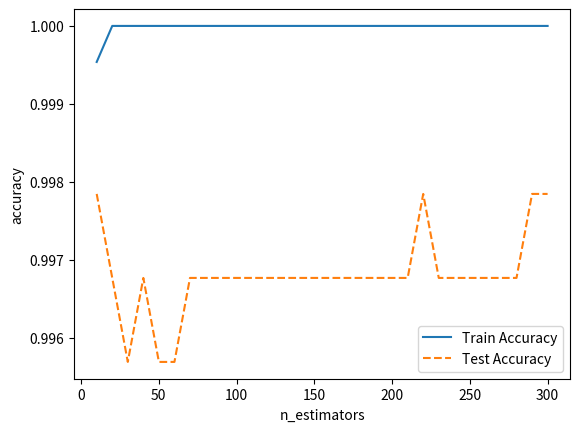

In [29]:
plt.plot(para_n_tree, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()

n_estimators = 100

In [31]:
# 최대 깊이 변경에 따른 모델 성능
train_accuracy = []
test_accuracy= []

para_depth = [depth for depth in range(3,21)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth=v_max_depth, n_estimators=100, random_state=1500)
    rf.fit(x_train_ros, y_train_ros)
    train_accuracy.append(rf.score(x_train_ros, y_train_ros))
    test_accuracy.append(rf.score(x_test_ros, y_test_ros))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy
df_accuracy_depth['Gap'] = df_accuracy_depth['TrainAccuracy'] - df_accuracy_depth['TestAccuracy']

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy,Gap
0,3,0.810,0.807,0.002
1,4,0.912,0.902,0.010
2,5,0.960,0.957,0.003
3,6,0.986,0.987,-0.001
4,7,0.991,0.989,0.002
5,8,0.996,0.994,0.002
6,9,0.997,0.996,0.002
7,10,0.998,0.994,0.005
8,11,0.999,0.995,0.004
9,12,0.999,0.996,0.003


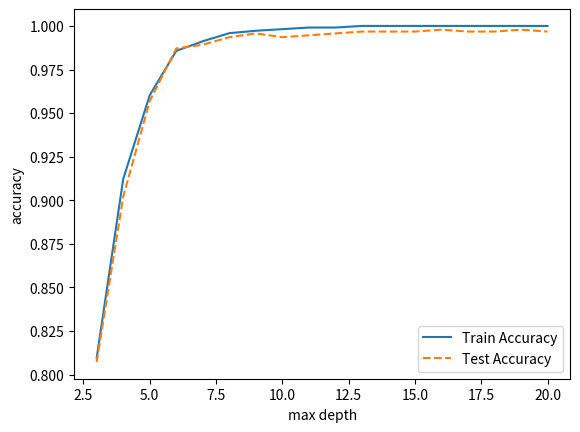

In [32]:
plt.plot(para_depth, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('max depth')
plt.legend()

max_depth = 7, 13

In [33]:
# 최종 모델_7
rf_final = RandomForestClassifier(max_depth=7, n_estimators=100, random_state=1500)

rf_final.fit(x_train_ros, y_train_ros)
y_pred = rf_final.predict(x_test_ros)

print("Accuracy on training set: {:.3f}".format(rf_final.score(x_train_ros, y_train_ros)))
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(x_test_ros, y_test_ros)))

print("Confusion matrix: \n{}".format(confusion_matrix(y_test_ros, y_pred)))

print(classification_report(y_test_ros, y_pred, digits=3))

Accuracy on training set: 0.991
Accuracy on test set: 0.989

Confusion matrix: 
[[466  10]
 [  0 453]]
              precision    recall  f1-score   support

           0      1.000     0.979     0.989       476
           1      0.978     1.000     0.989       453

    accuracy                          0.989       929
   macro avg      0.989     0.989     0.989       929
weighted avg      0.989     0.989     0.989       929



In [34]:
# 최종 모델_13
rf_final = RandomForestClassifier(max_depth=13, n_estimators=100, random_state=1500)

rf_final.fit(x_train_ros, y_train_ros)
y_pred = rf_final.predict(x_test_ros)

print("Accuracy on training set: {:.3f}".format(rf_final.score(x_train_ros, y_train_ros)))
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(x_test_ros, y_test_ros)))

print("Confusion matrix: \n{}".format(confusion_matrix(y_test_ros, y_pred)))

print(classification_report(y_test_ros, y_pred, digits=3))

Accuracy on training set: 1.000
Accuracy on test set: 0.997

Confusion matrix: 
[[473   3]
 [  0 453]]
              precision    recall  f1-score   support

           0      1.000     0.994     0.997       476
           1      0.993     1.000     0.997       453

    accuracy                          0.997       929
   macro avg      0.997     0.997     0.997       929
weighted avg      0.997     0.997     0.997       929



In [36]:
# 결론 도출
# 설명변수의 중요도
v_feature_name = x_train_ros.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
13,photoresist_bake,0.079
14,temp_softbake,0.064
20,input_Energy,0.059
1,Temp_OXid,0.057
12,spin3,0.057
3,Pressure,0.056
2,ppm,0.052
21,Temp_implantation,0.051
18,Temp_Etching,0.050
19,Source_Power,0.048


Text(0, 0.5, '설명변수')

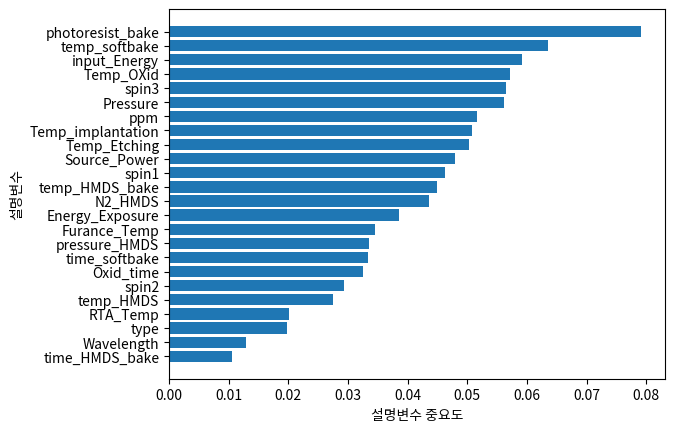

In [37]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [39]:
estimator = RandomForestClassifier(n_estimators = 100, random_state=1500)

param_grid = {"max_depth" : para_depth, "n_estimators" : para_n_tree}

grid_rf = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_rf.fit(x_train_ros, y_train_ros)

print("best estimator model : \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter : \n{}".format(grid_rf.best_params_))
print("\nbest score : \n{}".format(grid_rf.best_score_.round(3)))

best estimator model : 
RandomForestClassifier(max_depth=16, n_estimators=30, random_state=1500)

best parameter : 
{'max_depth': 16, 'n_estimators': 30}

best score : 
0.994
